
    
    
# Introduction to Simulation

## Complex social dynamics in a few lines of code

Source code for the DH2016 tutorial 
    
来源：https://github.com/xrubio/simulationdh （View it on [nbviewr](http://nbviewer.jupyter.org/github/xrubio/simulationdh/blob/v1.1/doc/DH2016tutorial.ipynb  ))


中文编译：http://python.jobbole.com/87570/

The tutorial was held on 11th July, 2016 within the **Digital Humanities conference** at Krakow, Poland.

We recommend to begin by taking a look at the introductory presentation at [doc/slides.pdf](https://github.com/xrubio/simulationdh). The second step would be to setup the environment and follow the tutorial at doc/DHtutorial.pdf. You can finally check the result against the code found in src/DHworkshop.py and extend the model to solve the challenges defined at the end of slides.pdf

We will create a model depicting **competition between two cultural traits** within a common population. This is a typical **cultural dynamics** scenario where individuals must adopt one option amongst two or more mutually exclusive options (i.e. religion, elections, football teams). In this case we are interested in situations when you have to choose one option (e.g., you cannot practice two religions), but more complex versions with individuals adopting more than one trait can easily be developed.

> Individuals can change their choice over time. The decision is based on the payoff of each trait. 

This payoff is a measure of the relative interest of the trait, based on:

a) how many people exhibits the trait and

b) the attractiveness of the trait.


An example of this dynamic could be a competition between two different religions. The number of people practicing a belief makes this belief more appealing. However, some beliefs could be intrinsically more interesting for some individuals so part of the population could adopt them even if they are a minority. Finally, social norms are not static so the attractiveness of specific beliefs can vary over time.

<img src = './img/socialsimulation.png'>

Time is divided in discrete steps starting at t = 0.

At each step t the two populations At and Bt are updated as individuals move from A to B and from B to A. Take into accout that the value here can be negative meaning that more people move from B to A.

At+1=At+ΔAB

Bt+1=Bt−ΔAB


Let's see how we can express it in code.

First, we need to define the number of individuals in the population. Say we want to start with 100 people. The text after a hash symbol is just a comment so you can skip it for now, but in general it is a good idea to keep documenting the code as you write.


In [1]:
N = 100   # total population size

In [2]:
# Then, we decide on how many believers of each cultural option (religion) we want to start with.
A = 65    # initial number of believers A
B = N - A # initial number of believers A

So let's calculate **variation** based on the population switching trait based on a comparison between payoffs. For example if B has higher payoff then A then we should get something like this:

### $$\Delta_{A \rightarrow B} = A (Payoff_{A \rightarrow B} - Payoff_{B \rightarrow A})$$

So the proportion of population A that switches to B is proportional to the difference between payoffs. As we mentioned the payoff of a trait is determined by the population exhibiting the competing trait as well as its intrinsic attractiveness.

To define the payoff we need to implement the following competition equations:
    
###    $$ Payoff_{B \rightarrow A} = \frac{A_t}{N} \frac{T_A}{T_A + T_B}$$

###    $$ Payoff_{A \rightarrow B} = \frac{B_t}{N} \frac{T_B}{T_A + T_B}$$

- The first term is the proportion of the entire population N holding a particular cultural trait (At/N for A and Bt/N for B). 
- The second element of the equations is the balance between the attractiveness of both ideas (TA and TB) expressed as the attractiveness of the given trait in respect to the total 'available' attractiveness (TA+TB).



In [3]:
def payoff(believers, Tx,Ty):    
    proportionBelievers = believers/N
    attraction = Tx/(Ty + Tx)
    return proportionBelievers * attraction

In [4]:
# temporal dimension
MAX_TIME = 100
t = 0               # initial time

# init populations
N = 100          # population size
A = 65           # initial population of believers A
B = N-A             # initial population of believers B

# additional params
Ta = 1.0            # initial attractiveness of option A
Tb = 2.0            # initial attractiveness of option B
alpha = 0.1         # strength of the transmission process

In [24]:
# calculate the payoff for change of believers A and B in the current time step       
variationBA = payoff(A, Ta, Tb)      
variationAB = payoff(B, Tb, Ta)     
difference = variationBA - variationAB
difference

# the proportion of population B that switches to A is proportional to the difference between payoffs.

-0.3076400143856337

In [6]:
# when difference > 0, B will switch to A
# Else, A will switch to B.

# B -> A   
if difference > 0:
    variation = difference*B
# A -> B        
else:
    variation = difference*A
    
variation

# when variation > 0, B will switch to A
# Else, A will switch to B.

0.0

In [7]:
# control the pace of change with alpha
variation = alpha*variation 

In [8]:
while t < MAX_TIME:
    # calculate the payoff for change of believers A and B in the current time step       
    variationBA = payoff(A, Ta, Tb)      
    variationAB = payoff(B, Tb, Ta)     
    difference = variationBA - variationAB
             
    # B -> A   
    if difference > 0:
        variation = difference*B
    # A -> B        
    else:
        variation = difference*A
        
    # control the pace of change with alpha
    variation = alpha*variation  
    
    # update the population    
    A = A + variation
    B = B - variation
    
    # advance time to next iteration
    t = t + 1

## Tracing the changes

- First, add the initial number of believers to their respective lists. 
- Second, we also need to update the number of believers for each step. 

In [9]:
# initialisation 
MAX_TIME = 100
t = 0               # initial time
N = 100           # population size
A = 65              # initial proportion of believers A
B = N-A             # initial proportion of believers B

Ta = 1.0            # initial attractiveness of option A
Tb = 2.0            # initial attractiveness of option B
alpha = 0.1         # strength of the transmission process

# initialise the list used for plotting
believersA = []    
believersB = []

# add the initial populations
believersA.append(A) 
believersB.append(B)

In [10]:
while t < MAX_TIME: 
    # calculate the payoff for change of believers A and B in the current time step       
    variationBA = payoff(A, Ta, Tb)      
    variationAB = payoff(B, Tb, Ta)     
    difference = variationBA - variationAB
    
        # B -> A   
    if difference > 0:
        variation = difference*B
    # A -> B        
    else:
        variation = difference*A
        
    # control the pace of change with alpha
    variation = alpha*variation  
    
    # update the population    
    A = A + variation
    B = B - variation   
    
    # save the values to a list for plotting    
    believersA.append(A)
    believersB.append(B)
    
    # advance time to next iteration
    t = t + 1

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt      # plotting library
plt.style.use('ggplot')              # makes the graphs look pretty

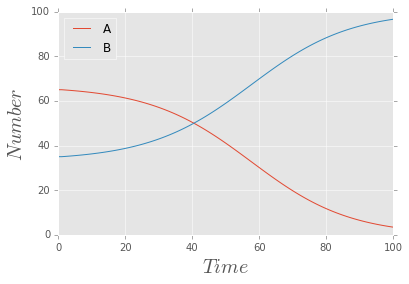

In [12]:
# plot the results    
plt.plot(believersA, label = 'A')
plt.plot(believersB, label = 'B')
plt.xlabel('$Time$', fontsize = 20)
plt.ylabel('$Number$', fontsize = 20)
plt.legend(loc = 0)
plt.show()

## Let the attractiveness of each optio change through time.

In [13]:
def attractiveness(Ta, Tb):
    Ka = 0.1  
    Kb = 0
    
    Ta = Ta + Ka
    Tb = Tb + Kb
    return Ta, Tb

In [14]:
# initialisation 
MAX_TIME = 100
t = 0               # initial time
N = 100           # population size
A = 65              # initial proportion of believers A
B = N-A             # initial proportion of believers B

Ta = 1.0            # initial attractiveness of option A
Tb = 2.0            # initial attractiveness of option B
alpha = 0.1         # strength of the transmission process

# initialise the list used for plotting
believersA = []    
believersB = []

# add the initial populations
believersA.append(A) 
believersB.append(B)

In [15]:
while t < MAX_TIME: 
    # update attractiveness
    Ta, Tb = attractiveness(Ta, Tb)
    # calculate the payoff for change of believers A and B in the current time step           
    variationBA = payoff(A, Ta, Tb)      
    variationAB = payoff(B, Tb, Ta)     
    difference = variationBA - variationAB
    
        # B -> A   
    if difference > 0:
        variation = difference*B
    # A -> B        
    else:
        variation = difference*A
        
    # control the pace of change with alpha
    variation = alpha*variation  
    
    # update the population    
    A = A + variation
    B = B - variation   
    
    # save the values to a list for plotting    
    believersA.append(A)
    believersB.append(B)
    
    # advance time to next iteration
    t = t + 1

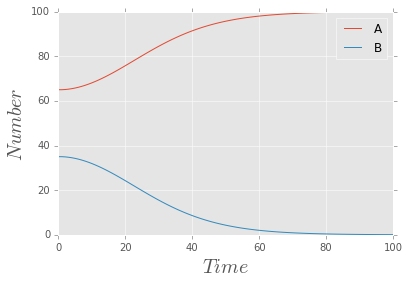

In [16]:
# plot the results    
plt.plot(believersA, label = 'A')
plt.plot(believersB, label = 'B')
plt.xlabel('$Time$', fontsize = 20)
plt.ylabel('$Number$', fontsize = 20)
plt.legend(loc = 0)
plt.show()

There are a number of functions we can use to dynamically change the 'attractiveness' of each trait. 
Try the following ones:


In [17]:
import numpy as np # stick this line at the beginning of the script alongside other 'imports'


def attractiveness2(Ta, Tb):
    # temporal autocorrelation with stochasticity (normal distribution)
    # we get 2 samples from a normal distribution N(0,1)
    Ka, Kb = np.random.normal(0, 1, 2)
    # compute the difference between Ks
    diff = Ka-Kb
    # apply difference of Ks to attractiveness
    Ta += diff
    Tb -= diff
    return Ta, Tb

def attractiveness3(Ta, Tb):
    #  anti-conformism dynamics (more population means less attractiveness)
    
    # both values initialized at 0
    Ka = 0
    Kb = 0
    
    # first we sample gamma with mean=last popSize of A times relevance    
    diffPop = np.random.gamma(believersA[t])
    # we sustract from this value the same computation for population B
    diffPop = diffPop - np.random.gamma(believersB[t])
    
    # if B is larger then we need to increase the attractiveness of A
    if diffPop < 0:
        Ka = -diffPop
    # else A is larger and we need to increase the attractiveness of B
    else:
        Kb = diffPop
    
    # change current values
    Ta = Ta + Ka
    Tb = Tb + Kb
    
    return Ta, Tb

###  temporal autocorrelation with stochasticity (normal distribution)


In [37]:
# initialisation 
MAX_TIME = 100
t = 0               # initial time
N = 100           # population size
A = 65              # initial proportion of believers A
B = N-A             # initial proportion of believers B

Ta = 1.0            # initial attractiveness of option A
Tb = 2.0            # initial attractiveness of option B
alpha = 0.1         # strength of the transmission process

# initialise the list used for plotting
believersA = []    
believersB = []

# add the initial populations
believersA.append(A) 
believersB.append(B)

In [38]:
while t < MAX_TIME: 
    # update attractiveness
    Ta, Tb = attractiveness2(Ta, Tb)
    # calculate the payoff for change of believers A and B in the current time step           
    variationBA = payoff(A, Ta, Tb)      
    variationAB = payoff(B, Tb, Ta)     
    difference = variationBA - variationAB
    
        # B -> A   
    if difference > 0:
        variation = difference*B
    # A -> B        
    else:
        variation = difference*A
        
    # control the pace of change with alpha
    variation = alpha*variation  
    
    # update the population    
    A = A + variation
    B = B - variation   
    
    # save the values to a list for plotting    
    believersA.append(A)
    believersB.append(B)
    
    # advance time to next iteration
    t = t + 1

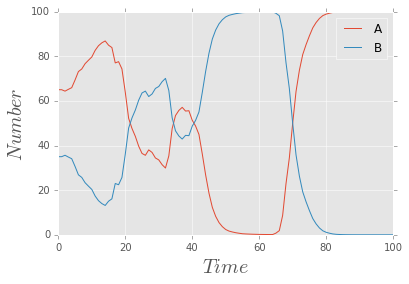

In [39]:
# plot the results    
plt.plot(believersA, label = 'A')
plt.plot(believersB, label = 'B')
plt.xlabel('$Time$', fontsize = 20)
plt.ylabel('$Number$', fontsize = 20)
plt.legend(loc = 0)
plt.show()

### anti-conformism dynamics (more population means less attractiveness)

In [40]:
# initialisation 
MAX_TIME = 100
t = 0               # initial time
N = 100           # population size
A = 65              # initial proportion of believers A
B = N-A             # initial proportion of believers B

Ta = 1.0            # initial attractiveness of option A
Tb = 2.0            # initial attractiveness of option B
alpha = 0.1         # strength of the transmission process

# initialise the list used for plotting
believersA = []    
believersB = []

# add the initial populations
believersA.append(A) 
believersB.append(B)

In [41]:
while t < MAX_TIME: 
    # update attractiveness
    Ta, Tb = attractiveness3(Ta, Tb)
    # calculate the payoff for change of believers A and B in the current time step           
    variationBA = payoff(A, Ta, Tb)      
    variationAB = payoff(B, Tb, Ta)     
    difference = variationBA - variationAB
    
        # B -> A   
    if difference > 0:
        variation = difference*B
    # A -> B        
    else:
        variation = difference*A
        
    # control the pace of change with alpha
    variation = alpha*variation  
    
    # update the population    
    A = A + variation
    B = B - variation   
    
    # save the values to a list for plotting    
    believersA.append(A)
    believersB.append(B)
    
    # advance time to next iteration
    t = t + 1

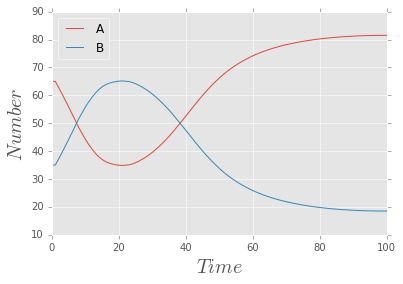

In [42]:
# plot the results    
plt.plot(believersA, label = 'A')
plt.plot(believersB, label = 'B')
plt.xlabel('$Time$', fontsize = 20)
plt.ylabel('$Number$', fontsize = 20)
plt.legend(loc = 0)
plt.show()

In [43]:
import numpy as np

In [46]:
np.log(200)

5.2983173665480363

In [55]:
sum200 = 0
sum1000 = 0

for i in range(1, 201):
    sum200 += np.log(i)
    
for i in range(1, 1001):
    sum1000 += np.log(i)
    
np.float(sum200)/sum1000

0.14601036397237721

In [52]:
sum200

863.23198719240543

In [53]:
sum1000

array([], dtype=float64)

In [54]:
for i in range(1, 1001):
    print np.log(i)

0.0
0.69314718056
1.09861228867
1.38629436112
1.60943791243
1.79175946923
1.94591014906
2.07944154168
2.19722457734
2.30258509299
2.3978952728
2.48490664979
2.56494935746
2.63905732962
2.7080502011
2.77258872224
2.83321334406
2.8903717579
2.94443897917
2.99573227355
3.04452243772
3.09104245336
3.13549421593
3.17805383035
3.21887582487
3.25809653802
3.295836866
3.33220451018
3.36729582999
3.40119738166
3.43398720449
3.4657359028
3.49650756147
3.52636052462
3.55534806149
3.58351893846
3.61091791264
3.63758615973
3.66356164613
3.68887945411
3.7135720667
3.73766961828
3.76120011569
3.78418963392
3.80666248977
3.82864139649
3.85014760171
3.87120101091
3.89182029811
3.91202300543
3.93182563272
3.95124371858
3.97029191355
3.98898404656
4.00733318523
4.02535169074
4.04305126783
4.06044301055
4.07753744391
4.09434456222
4.11087386417
4.12713438505
4.14313472639
4.15888308336
4.1743872699
4.18965474203
4.20469261939
4.21950770518
4.2341065046
4.24849524205
4.26267987704
4.27666611902
4.290459441